# 导入package

In [1]:
# 数据处理
import numpy as np 
import pandas as pd 

#数据可视化
from matplotlib import pyplot as plt 
import seaborn as sns

# 机器学习
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.cluster import KMeans



# 读取数据

In [2]:
df = pd.read_csv('/Users/robert/workspace/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 查看数据行数和列数
1338行，7列

In [4]:
df.shape

(1338, 7)

In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# 查看缺失值

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 查看地区分布

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# 描述数据概况

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 可视化概览

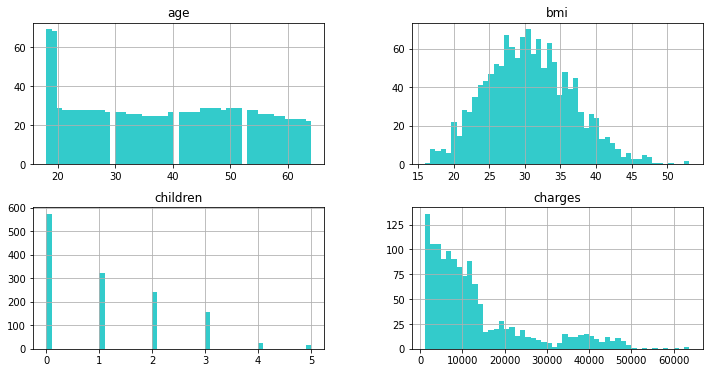

In [9]:
df[['age', 'bmi', 'children', 'charges']].hist(color="c", alpha=0.8, bins=50, figsize=(12, 6));

# 按bmi指数分组

In [10]:
bins=[15,25,35,45,55]
labels=['15-25','25-35','35-45','45-55']
df['bmi_new']=pd.cut(df['bmi'], bins, labels)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_new
0,19,female,27.900,0,yes,southwest,16884.92400,"(25, 35]"
1,18,male,33.770,1,no,southeast,1725.55230,"(25, 35]"
2,28,male,33.000,3,no,southeast,4449.46200,"(25, 35]"
3,33,male,22.705,0,no,northwest,21984.47061,"(15, 25]"
4,32,male,28.880,0,no,northwest,3866.85520,"(25, 35]"


In [11]:
# 不同bmi指数区间人数统计
df['bmi_new'].value_counts()

(25, 35]    775
(35, 45]    296
(15, 25]    247
(45, 55]     20
Name: bmi_new, dtype: int64

In [12]:
# 按照bmi区间计算各区间平均医疗费用
df.groupby(df.bmi_new).charges.mean()

bmi_new
(15, 25]    10284.290025
(25, 35]    12720.254311
(35, 45]    16913.681515
(45, 55]    17547.926750
Name: charges, dtype: float64

[Text(0.5, 1.0, 'bmi Vs Charges')]

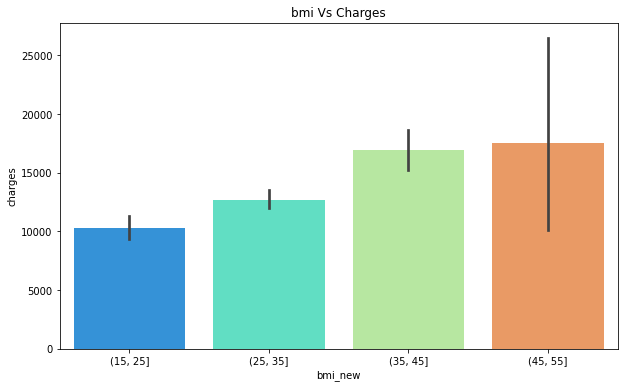

In [13]:
# 各bmi区间平均医疗费用可视化
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df.bmi_new,y=df.charges,palette='rainbow').set(title='bmi Vs Charges')

# 按年龄重新分组

In [14]:
bins = [0,20,40,60,100]
df['ages'] = pd.cut(df['age'], bins,labels=('teenager','young','middle','old'))
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_new,ages
0,19,female,27.900,0,yes,southwest,16884.92400,"(25, 35]",teenager
1,18,male,33.770,1,no,southeast,1725.55230,"(25, 35]",teenager
2,28,male,33.000,3,no,southeast,4449.46200,"(25, 35]",young
3,33,male,22.705,0,no,northwest,21984.47061,"(15, 25]",young
4,32,male,28.880,0,no,northwest,3866.85520,"(25, 35]",young


In [15]:
# 各年龄段人数
df.ages.value_counts()

middle      546
young       535
teenager    166
old          91
Name: ages, dtype: int64

In [16]:
# 按年龄段计算各年龄段平均医疗费用支出
df.groupby(df.ages).charges.mean()


ages
teenager     8713.482413
young       10686.686643
middle      15888.757668
old         21063.163398
Name: charges, dtype: float64

[Text(0.5, 1.0, 'Age Vs Charges')]

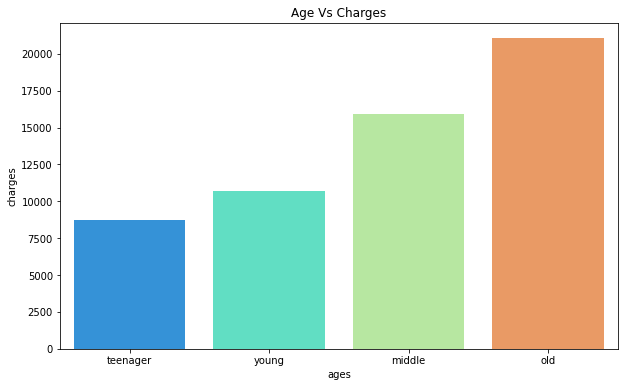

In [17]:
# 各年龄段平均医疗费用支出可视化
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df.ages,y=df.charges,palette='rainbow', ci=0).set(title='Age Vs Charges')

In [18]:
df.pivot_table('charges',index=['ages', 'bmi_new'],aggfunc='mean').unstack()

charges                                          
bmi_new       (15, 25]      (25, 35]      (35, 45]      (45, 55]
ages                                                            
teenager   4966.381229   9483.077216  10752.722294   1163.462700
young      8780.599196   9847.835873  15022.590137  17695.997311
middle    13677.721125  15152.967553  18867.934590  19053.109651
old       17631.984615  21974.555277  20940.191050           NaN

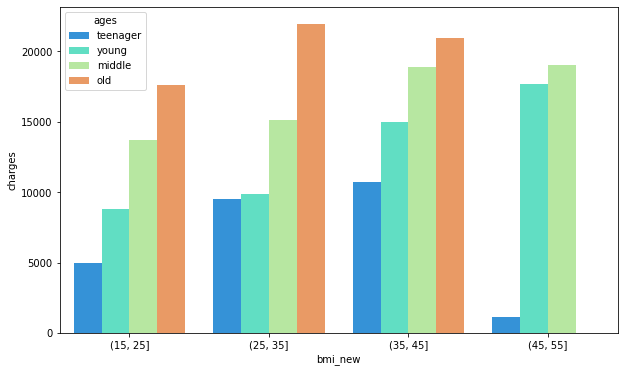

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='bmi_new', y='charges', hue='ages', data=df, ci=0, palette='rainbow')

# 四个地区的数据分布

In [20]:
# 查看四个区域的数据行数
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [21]:
df.pivot_table('charges',index=['sex', 'smoker'],columns='children',aggfunc='mean')

children                  0             1             2             3  \
sex    smoker                                                           
female no       7688.318863   8758.560884   9921.777645  10128.716357   
       yes     30685.059887  30264.253915  31663.833195  30681.604257   
male   no       7530.806677   7837.147396   9020.567024   9025.530139   
       yes     31902.398075  32904.876848  35297.837461  33869.169434   

children                  4            5  
sex    smoker                             
female no      13937.674562   8544.11305  
       yes              NaN  19023.26000  
male   no      10305.014255   7931.65831  
       yes     26532.276933          NaN

In [22]:
df.pivot_table('charges',index=['sex', 'smoker'],columns='children',aggfunc='count')

children           0      1     2     3     4     5
sex    smoker                                      
female no      236.0  133.0  97.0  63.0  11.0   7.0
       yes      53.0   25.0  22.0  14.0   NaN   1.0
male   no      223.0  130.0  88.0  55.0  11.0  10.0
       yes      62.0   36.0  33.0  25.0   3.0   NaN

[Text(0.5, 1.0, 'region Vs Charges')]

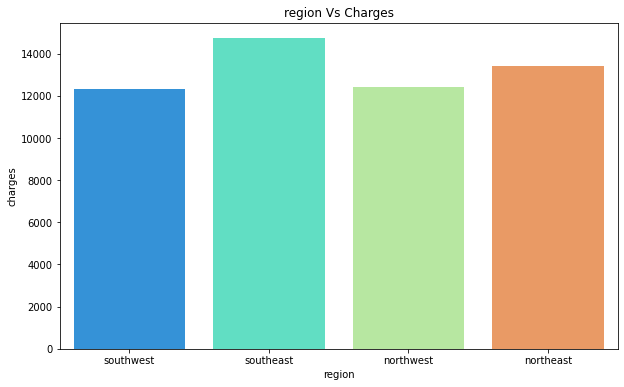

In [23]:
# 四个地区平均医疗费用支出可视化
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df.region,y=df.charges,palette='rainbow', ci=0).set(title='region Vs Charges')

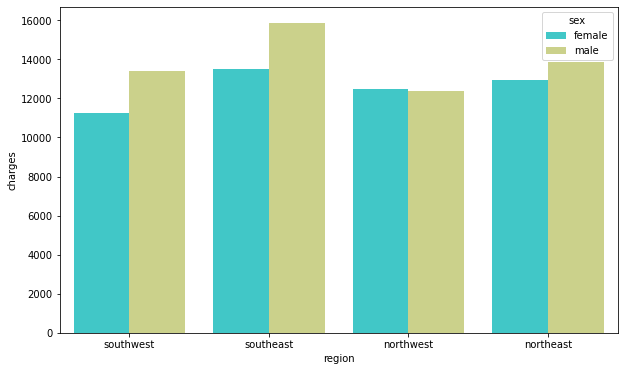

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, ci=0, palette='rainbow')

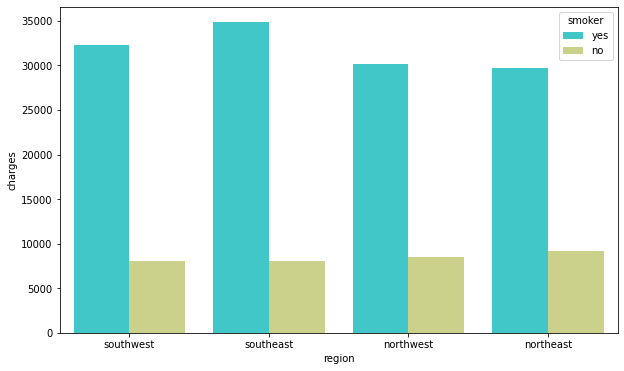

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, ci=0, palette='rainbow')


<AxesSubplot:xlabel='region', ylabel='charges'>

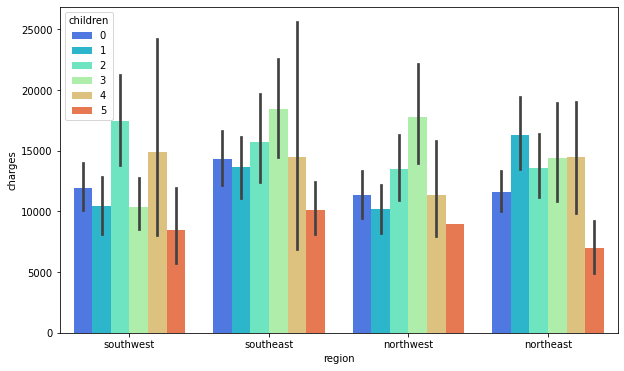

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='rainbow')

# 相关系数图

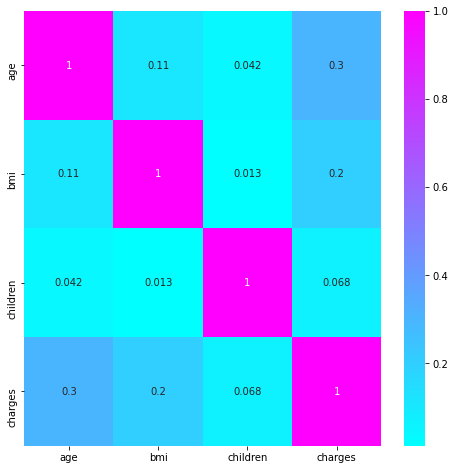

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

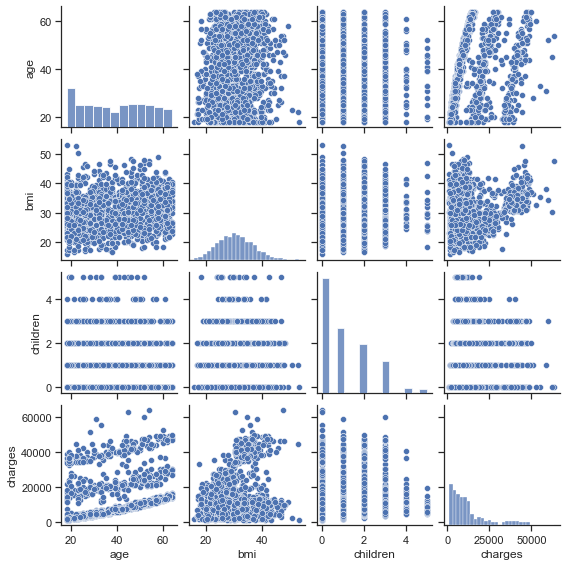

In [28]:
sns.set(style="ticks")
sns.pairplot(df,  height=2);

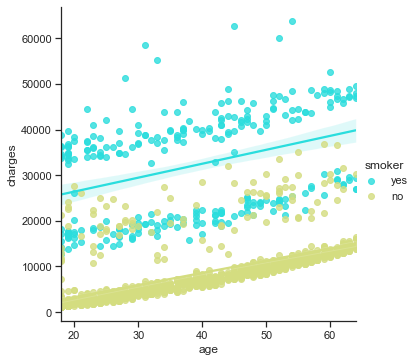

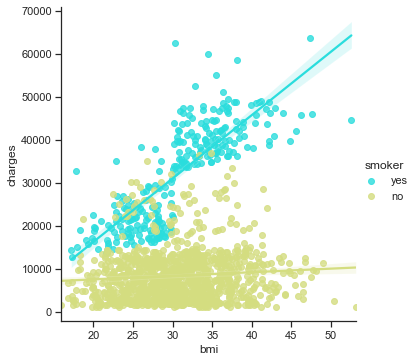

In [29]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='rainbow')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='rainbow')

<Figure size 1008x432 with 0 Axes>

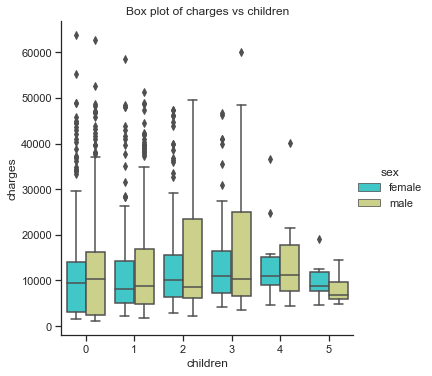

In [30]:
plt.figure(figsize=(14,6))
sns.catplot(x='children', y='charges',hue='sex',data=df,palette='rainbow',kind="box")
plt.title('Box plot of charges vs children');

In [31]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


<Figure size 1008x432 with 0 Axes>

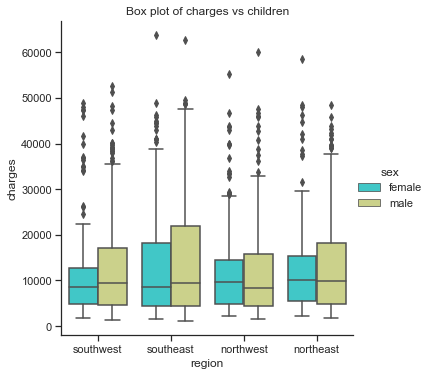

In [32]:
plt.figure(figsize=(14,6))
sns.catplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',kind="box")
plt.title('Box plot of charges vs children');

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

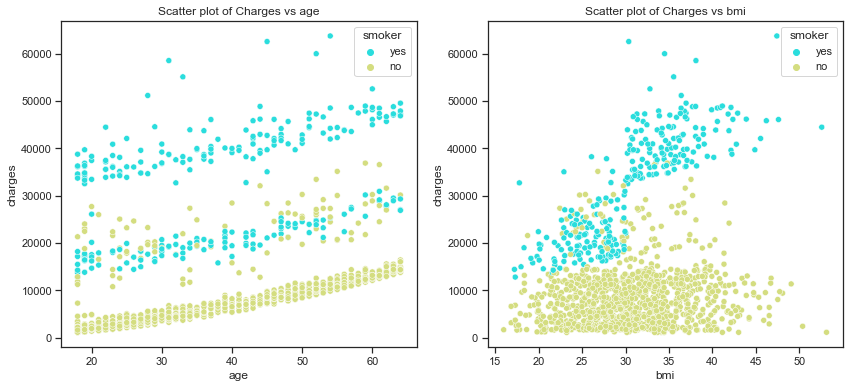

In [33]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='rainbow',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = fig.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='rainbow',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


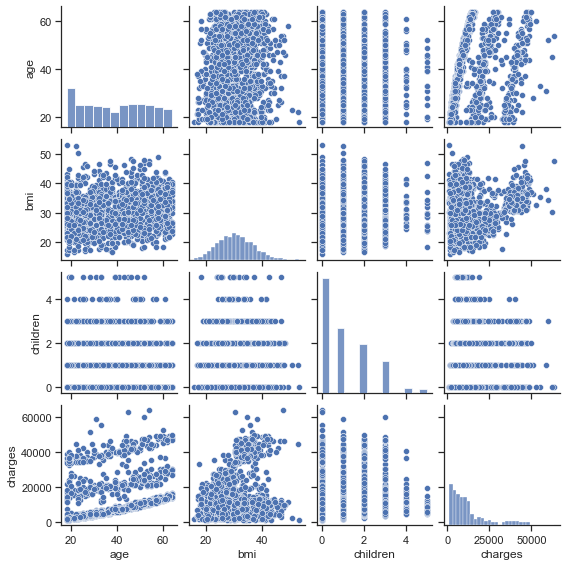

In [34]:
sns.set(style="ticks")
sns.pairplot(df,  size=2);

# 线性回归

In [35]:
# 将离散型标签数据数值化

df['sex'] = df['sex'].astype('category').cat.codes

df['smoker'] = df['smoker'].astype('category').cat.codes
df['region'] = df['region'].astype('category').cat.codes
df.dtypes

age            int64
sex             int8
bmi          float64
children       int64
smoker          int8
region          int8
charges      float64
bmi_new     category
ages        category
dtype: object

In [36]:
# 构建特征矩阵

X_charges = df.drop(['charges','ages','bmi_new'], axis=1)
X_charges.shape

(1338, 6)

In [37]:
y_charges = df['charges']
y_charges.shape

(1338,)

In [38]:
# 分割测试集和验证集
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test  = train_test_split(X_charges, y_charges,
                                                random_state=0, train_size=0.7)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((936, 6), (402, 6), (936,), (402,))

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print('intercept_ ', model.intercept_)
print('coef_ ',model.coef_)

intercept_  -11827.733141795721
coef_  [  256.5772619    -49.39232379   329.02381564   479.08499828
 23400.28378787  -276.31576201]


## 在验证集上验证模型准确率

$$
R^2 = 1- \frac{RSS}{TSS}
$$

RSS：残差平方和  
TSS：总平方和

In [40]:
from sklearn.metrics import r2_score

y_predict = model.predict(x_test) 
r2_score(y_test, y_predict)

0.7911113876316934

# KMeans聚类

In [41]:
df2 = df[['bmi', 'charges']]


In [42]:
from sklearn.cluster import KMeans

In [43]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(df2)

KMeans(n_clusters=3)

In [44]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[3.04320311e+01 6.29601781e+03]
 [3.48454321e+01 4.07613086e+04]
 [2.91114984e+01 1.85057118e+04]]
[2 0 0 ... 0 0 2]


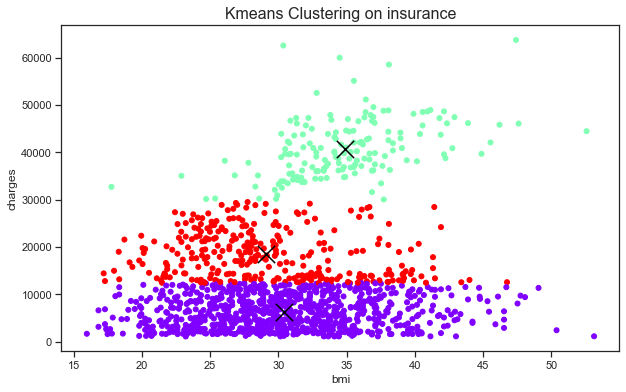

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df2.values[:,0], df2.values[:,1], c=kmeans.labels_, cmap="rainbow", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=300)
plt.title("Kmeans Clustering on insurance", fontsize=16)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()